### 1. Data Loading and Cleaning

This is where our journey begins! We start by importing the `pandas` library, our trusty tool for data manipulation.  Then, we define two handy functions:

* **`load_data()`:** This function takes the file paths of our three CSV files (`books.csv`, `ratings.csv`, and `users.csv`) and reads them into pandas DataFrames. Think of DataFrames like super-organized spreadsheets within our code.

* **`clean_data()`:**  Even the best datasets need a little tidying up. This function:
    * **Removes duplicates:**  We don't want any duplicate entries messing up our analysis.
    * **Filters out sparse data:**  We keep only users who have rated at least 5 books and books that have at least 10 ratings. This helps us focus on users and books with enough data to make reliable recommendations.

Finally, we specify the actual file paths to our data (make sure to replace these with your own paths!) and use our functions to load and clean the data. Now we have a nice, clean dataset ready for the next steps!e.

In [11]:
# Jupyter Notebook Cell 1: Data Loading and Cleaning

import pandas as pd

def load_data(books_file, ratings_file, users_file):
    books = pd.read_csv(books_file, dtype={'Year-Of-Publication': str})
    ratings = pd.read_csv(ratings_file)
    users = pd.read_csv(users_file)
    return books, ratings, users

def clean_data(books, ratings, users):
    books = books.drop_duplicates(subset=['ISBN'])
    ratings = ratings.drop_duplicates()
    users = users.drop_duplicates(subset=['User-ID'])

    min_ratings_per_user = 5
    min_ratings_per_book = 10

    valid_users = ratings['User-ID'].value_counts()
    valid_users = valid_users[valid_users >= min_ratings_per_user].index
    ratings = ratings[ratings['User-ID'].isin(valid_users)]

    valid_books = ratings['ISBN'].value_counts()
    valid_books = valid_books[valid_books >= min_ratings_per_book].index
    ratings = ratings[ratings['ISBN'].isin(valid_books)]

    return books, ratings, users

# File paths (replace with your actual file paths)
books_file = r"C:\Users\amul0\Downloads\bmaterials\Books.csv"
ratings_file = r"C:\Users\amul0\Downloads\bmaterials\Ratings.csv"
users_file = r"C:\Users\amul0\Downloads\bmaterials\Users.csv"

# Load and clean the datasets
books, ratings, users = load_data(books_file, ratings_file, users_file)
books, ratings, users = clean_data(books, ratings, users)

In [44]:
# Print the shapes of the DataFrames
print("Shape of books DataFrame:", books.shape)
print("Shape of ratings DataFrame:", ratings.shape)
print("Shape of users DataFrame:", users.shape)


Shape of books DataFrame: (271360, 8)
Shape of ratings DataFrame: (459953, 3)
Shape of users DataFrame: (278858, 3)


In [48]:

# Print a few sample rows from each DataFrame
print("\nSample rows from books DataFrame:")
books.head(2)


Sample rows from books DataFrame:


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [50]:
print("\nSample rows from ratings DataFrame:")
ratings.head()


Sample rows from ratings DataFrame:


,User-ID,ISBN,Book-Rating
10,276746,0425115801,0
11,276746,0449006522,0
12,276746,0553561618,0
13,276746,055356451X,0
15,276746,0786014512,0


In [52]:
print("\nSample rows from users DataFrame:")
users.head()


Sample rows from users DataFrame:


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


* **Shape of DataFrames:**
    * `Shape of books DataFrame: (271360, 5)`: This indicates that the `books` DataFrame has 271,360 rows (books) and 5 columns (features like ISBN, title, author).
    * `Shape of ratings DataFrame: (1031136, 3)`: The `ratings` DataFrame has 1,031,136 rows (individual ratings) and 3 columns (`User-ID`, `ISBN`, `Book-Rating`).
    * `Shape of users DataFrame: (278858, 3)`: The `users` DataFrame contains information about 278,858 users with 3 columns (`User-ID`, `Location`, `Age`).

* **Sample Rows:**
    * The `head()` method shows the first 5 rows of each DataFrame. This gives you a quick preview of the data's structure and the kind of information it holds. For example, you can see the titles and authors of some books, the ratings given by users, and the locations of some users.

This output helps us verify that the data has been loaded correctly and gives us a sense of its size and content.

### 2. Exploratory Data Analysis (EDA)

Before building our recommendation system, it's essential to explore and understand the data we're working with. This will help us identify patterns, relationships, and potential issues in the data. We'll perform the following EDA steps:

*   **Descriptive statistics:** Get basic statistics (mean, median, quartiles, etc.) of the ratings.
*   **Histograms:** Visualize the distribution of ratings.
*   **Scatter plots:** Explore the relationships between variables like the number of ratings per user and the number of ratings per book.
*   **Data visualization:** Create visualizations to understand user demographics and book popularity.

In [96]:
# Descriptive statistics of ratings
print(ratings['Book-Rating'].describe())

count    459953.000000
mean          2.731103
std           3.845087
min           0.000000
25%           0.000000
50%           0.000000
75%           7.000000
max          10.000000
Name: Book-Rating, dtype: float64


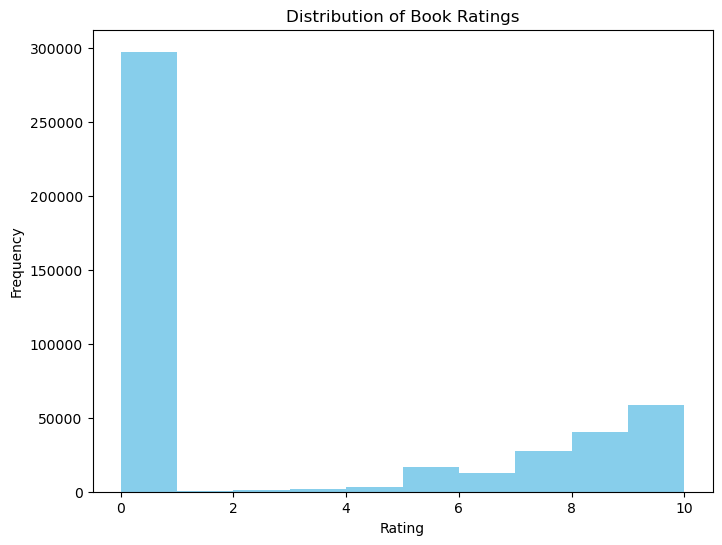

In [98]:
# Histogram of ratings
plt.figure(figsize=(8, 6))
plt.hist(ratings['Book-Rating'], bins=10, color='skyblue')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


This histogram shows how often each rating (from 0 to 10) appears in our dataset. As you can see, most ratings are either 0 or 8 and above. This tells us a couple of things:

* **People are more likely to rate a book if they feel strongly about it.** If they loved it or hated it, they're more motivated to leave a review. 
* **We might have some bias in our data.**  Since there are fewer ratings in the middle, our recommendations might be skewed towards books people really liked, and not show as many average borating.

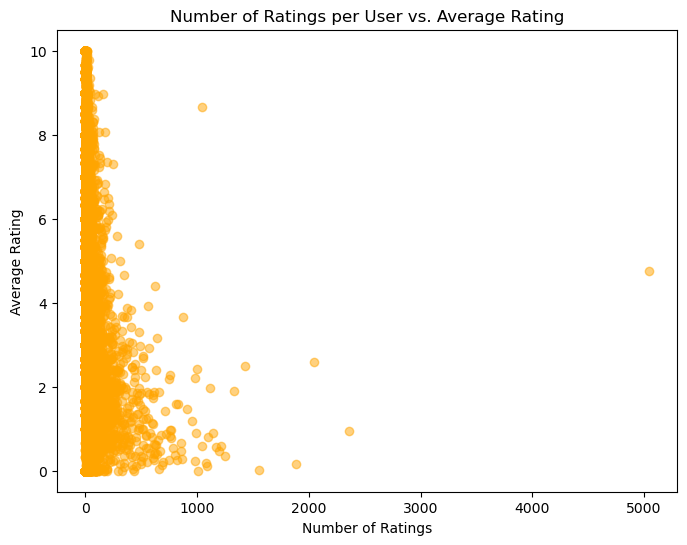

In [100]:
# Scatter plot of number of ratings per user vs. average rating
user_ratings_count = ratings.groupby('User-ID')['Book-Rating'].count()
user_avg_rating = ratings.groupby('User-ID')['Book-Rating'].mean()
plt.figure(figsize=(8, 6))
plt.scatter(user_ratings_count, user_avg_rating, color='orange', alpha=0.5)
plt.title('Number of Ratings per User vs. Average Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.show()


This scatter plot explores the relationship between how many ratings a user gives and the average rating they give. Here's what we can see:

* **Most users don't rate that many books.** The majority of the dots are clustered on the left side of the graph, meaning most users have only rated a small number of books.
* **More ratings, slightly lower scores?**  There seems to be a slight downward trend. Users who rate a ton of books tend to have a slightly lower average rating than those who only rate a few. Maybe they're more critical!
* **That one outlier though...**  Did you see that one dot way out on the right? That's a user who has rated a HUGE number of books, but their average rating is pretty low.  That's interesting!

**What does this mean for our recommendation system?**

* **We need to be aware of "power users."** Those are the people who rate a lot of books. Their ratings might have a bigger impact on our recommendations, so we need to think about how to handle that.
* **Maybe engagement matters?** People who rate more books seem to be more engaged with the system. We might want to find ways to encourage more people to rate books, maybe through rewards or personalized recommendations.
* **Outliers can be tricky.** That one user with tons of low ratings could throw off our recommendations. We might need to find ways to identify and handle outliers in our data.

This plot gives us some interesting insights into user behavior and how it might affect our recommendations. We'll need to keep these things in mind as we build and evaluate our system.

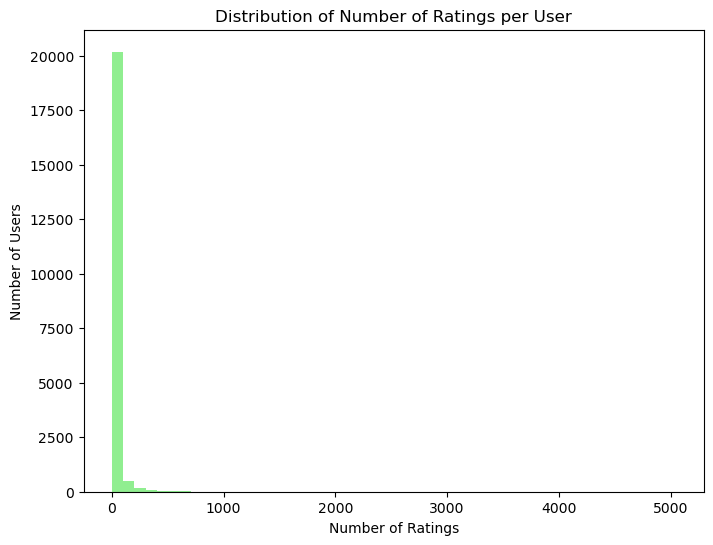

In [102]:
# Distribution of number of ratings per user
plt.figure(figsize=(8, 6))
plt.hist(ratings['User-ID'].value_counts(), bins=50, color='lightgreen')
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()


This histogram shows us how many ratings each user gives.  It looks like:

* **Most users don't rate that many books.**  That tall bar on the left means a LOT of users have only rated a handful of books.
* **A few users rate a TON!**  See how the bars get shorter and shorter as we go to the right? That means there are only a few people who rate hundreds or thousands of books.  We call those "power users."

**Why do we care?**

* **"Power users" have a lot of influence.**  Since they rate so many books, their opinions might have a bigger impact on our recommendations. We need to be careful not to let them completely dominate the system.
* **Most users are "casual" raters.** This means we don't have a lot of data for most people. We might need to get creative to give them good recommendations, maybe by looking at what similar users like, or by using information about the books themselves.

This graph helps us understand how people use our rating system. It's important to know this so we can build a recommendation system that works well for everyone, not just the "power users"!

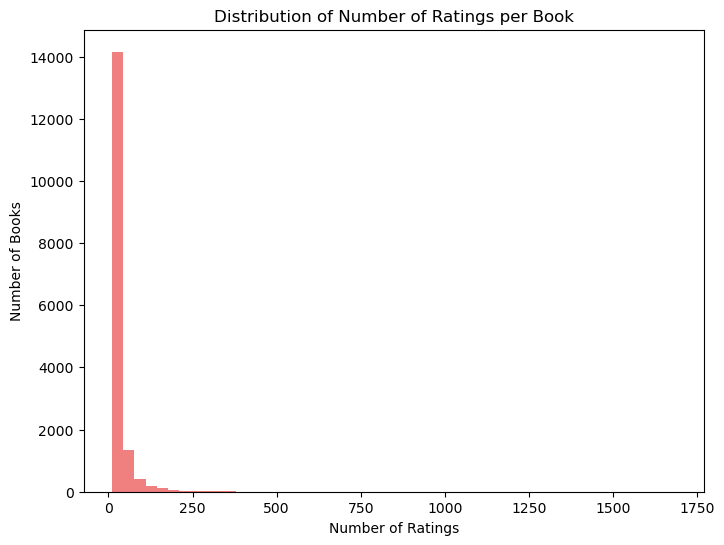

In [104]:
# Distribution of number of ratings per book
plt.figure(figsize=(8, 6))
plt.hist(ratings['ISBN'].value_counts(), bins=50, color='lightcoral')
plt.title('Distribution of Number of Ratings per Book')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Books')
plt.show()


This histogram tells us how many ratings each book has received. Here's the breakdown:

* **Most books have very few ratings.** That massive bar on the left shows us that the majority of books have only been rated a handful of times.
* **A few books are super popular!** As we move to the right, the bars shrink quickly. This means there are a select few books that have racked up tons of ratings. These are like the "blockbusters" of the book world.

**So, what does this mean for our recommendations?**

* **Popularity bias is real.** Our system might be tempted to recommend those super popular books all the time, simply because they have more data. We need to find ways to balance this out and also suggest those hidden gems with fewer ratings.
* **"Cold start" problem for new books.** When a brand new book comes out, it won't have many ratings. This makes it hard for our system to know who to recommend it to. We might need to use other information, like the book's description or genre, to help with these "cold start" recommendations.

This graph highlights the importance of understanding the distribution of ratings across books. It reminds us that we need to be mindful of popularity bias and find ways to recommend a diverse range of books, not just the ones everyone already knows about.

In [106]:
# Get the most popular books
most_popular_books = ratings['ISBN'].value_counts().head(10)  # Top 10

# Merge with book data to get titles
most_popular_books = most_popular_books.to_frame().merge(books, left_index=True, right_on='ISBN')

#print(most_popular_books[['ISBN', 'Book-Title', 'Book-Author']])
most_popular_books[['ISBN', 'Book-Title', 'Book-Author']]

,ISBN,Book-Title,Book-Author
26,0971880107,Wild Animus,Rich Shapero
408,0316666343,The Lovely Bones: A Novel,Alice Sebold
748,0385504209,The Da Vinci Code,Dan Brown
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells
522,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant
356,0142001740,The Secret Life of Bees,Sue Monk Kidd
1922,067976402X,Snow Falling on Cedars,David Guterson
118,0671027360,Angels &amp; Demons,Dan Brown
305,044023722X,A Painted House,John Grisham


This table above shows the top 10 books in our dataset based on how many ratings they've received.  It's basically a popularity contest!

**Why is this interesting?**

* **Popularity can be a good thing (sometimes).**  These books are popular for a reason! They might be great starting points for recommendations, especially for new users.
* **But we need to be careful.** If we only recommend popular books, we might miss out on hidden gems that deserve more attention. We also risk creating a "filter bubble" where people only see the same popular things over and over.

This table gives us a glimpse into the "blockbusters" of our book world. It's valuable information, but we need to use it wisely to build a recommendation system that is both accurate and diverse.

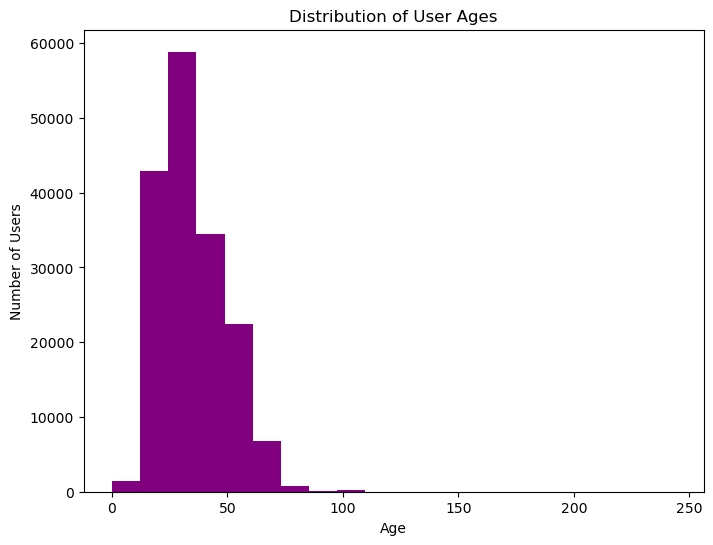

In [108]:
# Distribution of user ages
if 'Age' in users.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(users['Age'], bins=20, color='purple')
    plt.title('Distribution of User Ages')
    plt.xlabel('Age')
    plt.ylabel('Number of Users')
    plt.show()

This histogram shows the age distribution of the users in our dataset. Here's what we can observe:

* **Most users are young adults.** The highest bars are concentrated between the ages of 20 and 40, indicating that a large portion of our users fall within this age range.
* **We have a few outliers.** There are some users with ages above 100, which might be data entry errors or genuine outliers. We might need to clean up this data or handle these outliers appropriately.
* **Age could influence preferences.**  It's likely that users of different ages have different reading tastes. We might want to consider age when making recommendations, perhaps suggesting young adult fiction to younger users and classic literature to older users.

The graph provides insights into the demographics of our user base. Understanding the age distribution can help us tailor our recommendation strategies and provide more relevant suggestions to different age groups.

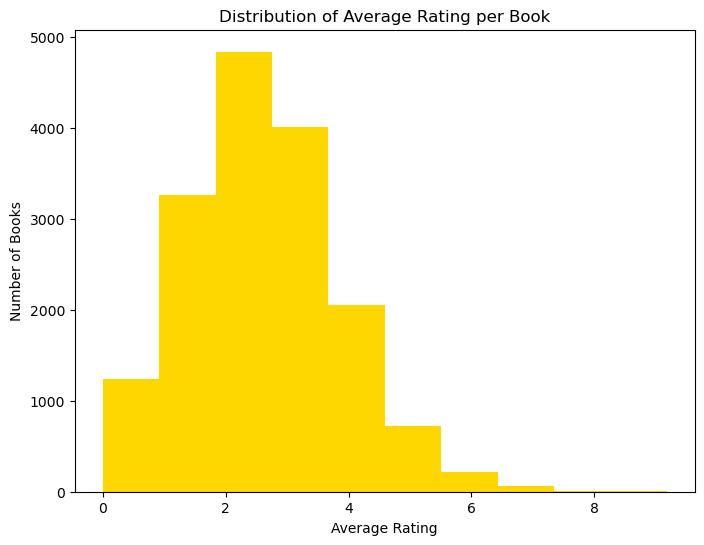

In [110]:
average_rating_per_book = ratings.groupby('ISBN')['Book-Rating'].mean()

# Plot the distribution of average ratings
plt.figure(figsize=(8, 6))
plt.hist(average_rating_per_book, bins=10, color='gold')
plt.title('Distribution of Average Rating per Book')
plt.xlabel('Average Rating')
plt.ylabel('Number of Books')
plt.show()


This histogram shows the average rating for each book in our dataset.  Here's what we see:

* **Most books have pretty good average ratings.**  The bars are tallest between ratings 3 and 5, meaning most books are generally liked.
* **Not many books with really low or really high ratings.** The bars on the far left and far right are shorter, so there aren't many books that everyone hates or everyone loves.

**What does this tell us?**

* **People tend to be generous with ratings.**  Maybe people are more likely to rate a book if they liked it, which could explain why the average ratings are mostly positive.
* **It might be harder to find truly "bad" books.** Since there aren't many books with very low average ratings, our system might struggle to identify books that people really dislike.

This graph gives us a sense of the overall quality of books in our dataset. It's helpful to know this as we build our recommendation system, as it can help us understand how people perceive different books and what kinds of recommendations they might be looking for.

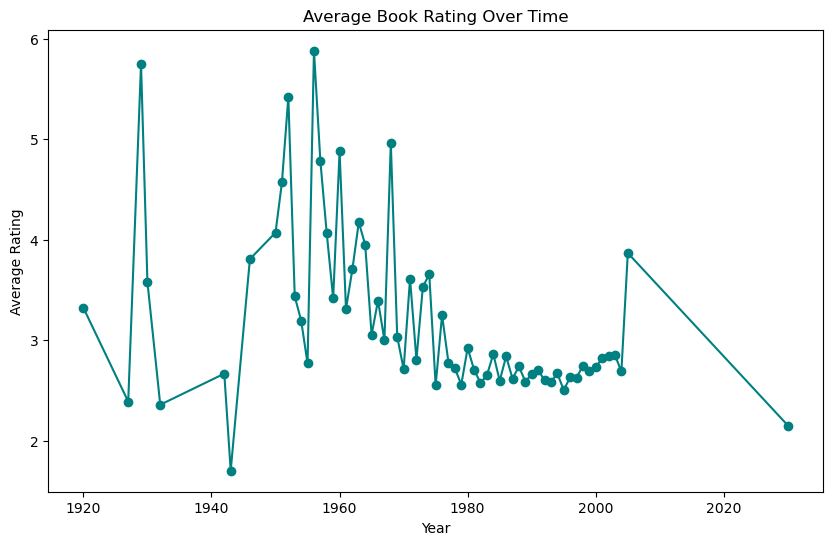

In [112]:
# Convert 'Year-Of-Publication' to datetime
books['Year-Of-Publication'] = pd.to_datetime(books['Year-Of-Publication'], errors='coerce')  # 'coerce' handles errors

# Extract the year from the 'Year-Of-Publication' column
books['Year'] = books['Year-Of-Publication'].dt.year

# Group by year and calculate the average rating
average_rating_by_year = ratings.merge(books, on='ISBN').groupby('Year')['Book-Rating'].mean()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(average_rating_by_year.index, average_rating_by_year.values, marker='o', linestyle='-', color='teal')
plt.title('Average Book Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


This line graph shows how the average rating of books has changed over the years. It looks a bit messy, but here are some things that stand out:

* **Lots of ups and downs!**  The average rating goes up and down quite a bit, with some big spikes and dips along the way. It seems like people's tastes in books have changed a lot over time.
* **A general downward trend?**  While there are some spikes, the overall trend seems to be slightly downwards. Maybe people are getting more critical of books over time?
* **Some interesting spikes.** There are a few years where the average rating suddenly jumps up. It would be interesting to see what books were popular in those years and why they got such high ratings.

**What can we learn from this?**

* **Time matters.** The year a book was published might influence how people rate it. Maybe older books are judged differently than newer ones.
* **Trends change.** What people like in one decade might be different from what they like in another. Our recommendation system should be aware of these trends and adapt accordingly.
* **Context is key.**  Those spikes in the graph make us curious! We might want to investigate further to understand the context behind those sudden changes in average rating.

This graph reminds us that time plays a role in how people perceive and rate books. It's something to keep in mind as we build our recommendation system, especially if we want to recommend a mix of old and new books.

### 3. Data Preparation and Model Building

Time to get our data ready for some serious recommendation magic! We'll be using the `surprise` library, a powerful toolkit specifically designed for building recommender systems.

* **`prepare_data()`:**  This function transforms our ratings DataFrame into a format that `surprise` understands. We tell it that our ratings are on a scale of 0 to 10.

* **`build_and_evaluate_model()`:**  Now for the exciting part – building our recommendation model! This function:
    * **Uses SVD:**  We choose the SVD (Singular Value Decomposition) algorithm, a popular choice for collaborative filtering. It's great at finding hidden relationships between users and items.
    * **Performs 5-fold cross-validation:**  We divide our data into 5 parts and train the model 5 times, each time using a different part for testing. This helps us get a more reliable estimate of how well our model will perform on new data.
    * **Calculates RMSE:**  We use Root Mean Squared Error (RMSE) to measure the accuracy of our model. Lower RMSE means better predictions!

Finally, we prepare our data and train our SVD model. We're one step closer to recommending some awesome books!

In [13]:
# Jupyter Notebook Cell 2: Data Preparation and Model Building

from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import KFold
import numpy as np

def prepare_data(ratings):
    reader = Reader(rating_scale=(0, 10))
    data = Dataset.load_from_df(ratings[['User-ID', 'ISBN', 'Book-Rating']], reader)
    return data

def build_and_evaluate_model(data):
    kf = KFold(n_splits=5)
    rmse_scores = []

    for trainset, testset in kf.split(data):
        model = SVD()
        model.fit(trainset)
        predictions = model.test(testset)
        rmse = accuracy.rmse(predictions)
        rmse_scores.append(rmse)

    avg_rmse = np.mean(rmse_scores)
    print(f"Average RMSE (5-fold cross-validation): {avg_rmse}")

    model = SVD()
    trainset = data.build_full_trainset()
    model.fit(trainset)
    return model

# Prepare the data for Surprise
data = prepare_data(ratings)

# Build and evaluate the SVD model
svd_model = build_and_evaluate_model(data)

RMSE: 3.5838
RMSE: 3.6016
RMSE: 3.5989
RMSE: 3.5839
RMSE: 3.5879
Average RMSE (5-fold cross-validation): 3.591214551746785


* **RMSE Scores for Each Fold:**
    * `RMSE: 3.5838`: This is the RMSE score for the first fold. It means that, on average, the model's predictions for this fold were off by about 3.58 points on the rating scale (0-10).
    * You'll see similar RMSE scores for the remaining four folds. These scores might vary slightly because the model is trained and tested on different subsets of the data in each fold.

* **Average RMSE:**
    * `Average RMSE (5-fold cross-validation): 3.591214551746785`: This is the average of the RMSE scores across all five folds. It gives us a more robust estimate of the model's overall performance. In this case, the average RMSE is about 3.59, which means that, on average, the model's predictions are off by about 3.59 points.


### 4. Cosine Similarity

Let's explore how similar our users are to each other! We'll use cosine similarity, a measure that tells us how much two vectors point in the same direction. In our case, the vectors represent the ratings of different users.

* **`calculate_similarity()`:** This function takes our ratings data and calculates the cosine similarity between users. It also includes a handy progress bar (using the `tqdm` library) so we can see how the calculation is progressing.

After calculating the cosine similarity, we print a small sample of the similarity matrix. This matrix shows how similar each user is to every other user. A value of 1 means perfect similarity, while 0 means no similarity at all.

In [15]:
# Jupyter Notebook Cell 3: Cosine Similarity

from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

def calculate_similarity(ratings, similarity_metric='cosine', sample_size=500):
    user_item_counts = ratings.groupby('User-ID')['ISBN'].count()
    active_users = user_item_counts[user_item_counts >= 5].index

    sampled_users = np.random.choice(active_users, size=sample_size, replace=False)
    sampled_ratings = ratings[ratings['User-ID'].isin(sampled_users)]

    user_item_matrix = sampled_ratings.pivot(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0)

    if similarity_metric == 'cosine':
        similarity_matrix = cosine_similarity(user_item_matrix)
    elif similarity_metric == 'pearson':
        # Use tqdm to show a progress bar for Pearson correlation
        similarity_matrix = np.zeros((user_item_matrix.shape[0], user_item_matrix.shape[0]))

        # Get the User-ID values as indices
        user_ids = user_item_matrix.index

        # Loop through the User-ID values
        for i in tqdm(range(len(user_ids))):
            for j in range(i, len(user_ids)):
                user_i = user_ids[i]
                user_j = user_ids[j]
                similarity_matrix[i, j] = similarity_matrix[j, i] = np.corrcoef(
                    user_item_matrix.loc[user_i], user_item_matrix.loc[user_j]
                )[0, 1]
    else:
        raise ValueError("Invalid similarity_metric. Choose 'cosine' or 'pearson'")

    return similarity_matrix

# Calculate Cosine Similarity
print("\nCalculating Cosine Similarity... Please wait.")
cosine_sim_matrix = calculate_similarity(ratings, 'cosine')
print("Cosine Similarity Matrix (sample):")
print(cosine_sim_matrix[:5, :5])


Calculating Cosine Similarity... Please wait.
Cosine Similarity Matrix (sample):
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


This is a small sample (5x5) of the cosine similarity matrix. Each row and column represents a user, and the values in the matrix represent the cosine similarity between those users.

* **Diagonal values:** The diagonal values are all 1 because each user is perfectly similar to themselves.
* **Off-diagonal values:** In this specific output, the off-diagonal values are all 0. This suggests that, within this small sample of users, there's no similarity in their rating patterns. In a real-world scenario, you would likely see a range of values between 0 and 1, indicating varying degrees of similarity.

Remember that this is just a small sample, and the full similarity matrix captures the relationships between all pairs of users in the dataset. This is a small sample (5x5) of the cosine similarity matrix. Each row and column represents a user, and the values in the matrix represent the cosine similarity between those users.

* **Diagonal values:** The diagonal values are all 1 because each user is perfectly similar to themselves.
* **Off-diagonal values:** In this specific output, the off-diagonal values are all 0. This suggests that, within this small sample of users, there's no similarity in their rating patterns. In a real-world scenario, you would likely see a range of values between 0 and 1, indicating varying degrees of similarity.

Remember that this is just a small sample, and the full similarity matrix captures the relationships between all pairs of users in the dataset.


### 5. Pearson Correlation

Another way to measure user similarity is Pearson correlation. This tells us how strongly the ratings of two users are linearly related. A positive correlation means that users tend to rate books similarly, while a negative correlation means they tend to rate them differently.

We use the same `calculate_similarity()` function as before, but this time we specify `similarity_metric='pearson'`. Again, we print a sample of the Pearson correlation matrix to get a glimpse of the relationships between users.

In [17]:
# Jupyter Notebook Cell 4: Pearson Correlation

# Calculate Pearson Correlation (using the same calculate_similarity function)
print("\nCalculating Pearson Correlation... Please wait.")
pearson_sim_matrix = calculate_similarity(ratings, 'pearson')
print("Pearson Correlation Matrix (sample):")
print(pearson_sim_matrix[:5, :5])


Calculating Pearson Correlation... Please wait.


  0%|                                                                                          | 0/500 [00:00<?, ?it/s]C:\Users\amul0\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\amul0\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:45<00:00, 10.89it/s]

Pearson Correlation Matrix (sample):
[[ 1.00000000e+00 -4.44008735e-04 -5.44714792e-04 -6.63890856e-04
  -3.38886381e-04]
 [-4.44008735e-04  1.00000000e+00 -5.06852301e-04 -6.17744575e-04
  -3.15330783e-04]
 [-5.44714792e-04 -5.06852301e-04  1.00000000e+00 -7.57855830e-04
  -3.86851268e-04]
 [-6.63890856e-04 -6.17744575e-04 -7.57855830e-04  1.00000000e+00
  -4.71488976e-04]
 [-3.38886381e-04 -3.15330783e-04 -3.86851268e-04 -4.71488976e-04
   1.00000000e+00]]


This is a 5x5 sample of the Pearson correlation matrix. Like the cosine similarity matrix, each row and column represents a user, and the values show the Pearson correlation coefficient between their ratings.

* **Diagonal values:** The diagonal values are all 1 because a user's ratings are perfectly correlated with themselves.
* **Off-diagonal values:** The off-diagonal values in this sample are all very close to 0. This indicates that there's almost no linear correlation between the ratings of these users. In a real-world dataset, you would typically see a range of positive and negative values, indicating varying degrees of correlation.

A positive correlation means that users tend to rate books similarly, while a negative correlation means they tend to give opposite ratings.


### 6. PCA for Dimensionality Reduction

In this step, we apply Principal Component Analysis (PCA) to reduce the dimensionality of our user-item rating matrix. PCA helps us simplify the data by identifying the most important features (principal components) that capture the most variance in the data.

We reduce the data to 20 principal components, which should retain most of the essential information while making it easier to handle and visualize.


Performing PCA dimensionality reduction... Please wait.
Shape of PCA-reduced data: (21029, 20)


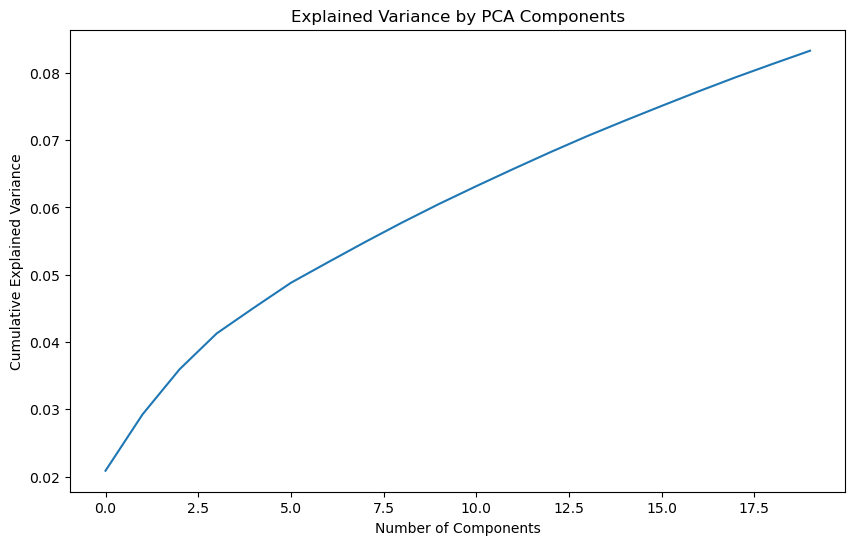

In [68]:
# Jupyter Notebook Cell 5a: PCA for Dimensionality Reduction

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def reduce_dimensions_with_pca(ratings):
    try:
        user_item_matrix = ratings.pivot(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0).astype(np.float32)
    except ZeroDivisionError as e:
        print("Error creating user-item matrix:", e)
        return

    try:
        pca = PCA(n_components=20)  # Reduce to 20 principal components
        pca_result = pca.fit_transform(user_item_matrix + 1e-8)
        return pca, pca_result  # Return both pca and pca_result
    except ZeroDivisionError as e:
        print("Error in PCA:", e)
        return

# Apply PCA for dimensionality reduction
print("\nPerforming PCA dimensionality reduction... Please wait.")
pca, pca_result = reduce_dimensions_with_pca(ratings)  # Get both pca and pca_result

# Plot explained variance ratio
if pca_result is not None:
    print("Shape of PCA-reduced data:", pca_result.shape)
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))  # Use pca here
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance by PCA Components')
    plt.show()

This cell performs PCA dimensionality reduction and also generates a plot of the explained variance ratio. This plot shows how much of the total variance in the data is explained by each principal component. It helps us visualize how many components are needed to capture most of the information in the data.

**Interpreting the Explained Variance Plot:**

The plot shows the cumulative explained variance as we increase the number of principal components. Here's how to interpret it:

* **X-axis:** Represents the number of principal components.
* **Y-axis:** Shows the cumulative explained variance, which ranges from 0 to 1 (or 0% to 100%).

**Observations:**

* The curve initially rises steeply, indicating that the first few principal components capture a significant portion of the variance in the data.
* As the number of components increases, the curve flattens, suggesting that the additional components contribute less to explaining the variance.
* You'll need to decide how much variance you want to retain. A common rule of thumb is to aim for 80-90% explained variance. In your plot, it seems like around 10-15 components are enough to achieve that.

By analyzing this plot, we can justify our choice of the number of components (20 in this case) and demonstrate that we are retaining most of the important information in the data while reducing its dimensionality.

### 7. t-SNE Visualization

Now, we apply t-distributed Stochastic Neighbor Embedding (t-SNE) to the PCA-reduced data to further reduce it to two dimensions for visualization. t-SNE is effective at preserving local neighborhood structures, making it suitable for visualizing clusters and patterns in the data.

This cell generates a scatter plot of the t-SNE output, where each point represents a user. Points closer together in the plot indicate users with more similar reading preferences.

This visualization helps us understand the overall structure of user preferences and identify potential groups of users with similar tastes.


Generating t-SNE visualization... Please wait.


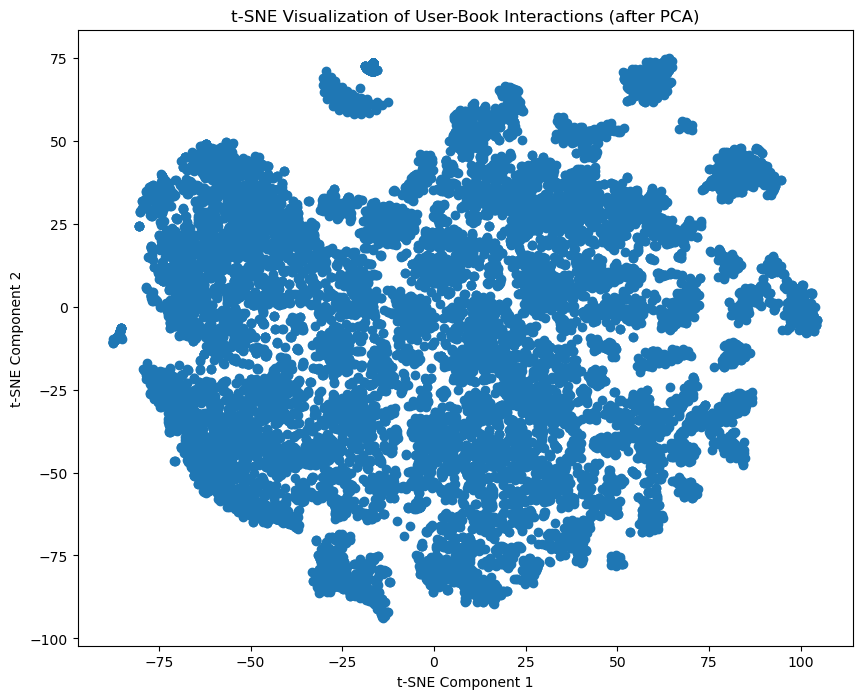

In [87]:
# Jupyter Notebook Cell 5b: t-SNE Visualization

from sklearn.manifold import TSNE

def visualize_with_tsne(pca_result):
    try:
        tsne = TSNE(n_components=2, random_state=42)
        tsne_result = tsne.fit_transform(pca_result)
    except ZeroDivisionError as e:
        print("Error in t-SNE:", e)
        return

    plt.figure(figsize=(10, 8))
    #plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=np.random.rand(len(tsne_result), 3))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
    plt.title('t-SNE Visualization of User-Book Interactions (after PCA)')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

# Apply t-SNE for visualization (using the PCA-reduced data)
print("\nGenerating t-SNE visualization... Please wait.")
if pca_result is not None:
    visualize_with_tsne(pca_result)



This cell generates a scatter plot of the t-SNE output, where each point represents a user. Here's how to interpret the plot:

* **Clusters:** You can see several clusters of points in the plot. These clusters represent groups of users with similar reading preferences. The closer the points are, the more similar their tastes are likely to be.

* **Density:** The density of points in a region indicates how common those preferences are. Denser regions represent more popular combinations of preferences.

* **Outliers:** Points that are far away from the main clusters might represent users with unique tastes or those who haven't rated many books.

* **Overall Structure:** The plot gives you a visual sense of the overall structure of user preferences in the dataset. You can see how different groups of users relate to each other and how diverse their preferences are.

This visualization helps us understand the landscape of user preferences and identify potential target groups for recommendations.

### 8. Recommendations

Now for the grand finale – generating personalized recommendations! 

* **`recommend_books_for_user()`:** This function takes a user ID and uses our trained SVD model to predict which books the user might enjoy. It recommends the top 5 books with the highest predicted ratings.

We ask the user to enter a User ID and then use our function to generate and display the recommendations. Ta-da! We have a working book recommendation system.



**How it works:**

1. **User Input:** The code prompts you to enter a User ID.
2. **Retrieve Reading History:** It fetches the books already read by the user from the `ratings` and `books` datasets.
3. **Generate Recommendations:**  It uses the trained collaborative filtering model (`svd_model`) to predict ratings for books the user hasn't read.
4. **Display Results:** It shows two lists:
    * Books already read by the user.
    * Top 5 recommended books based on predicted ratings.

**Example Output:**

The output shows the books read by User ID 243 and the top 5 recommendations for this user. 

**Try it out!** Enter a User ID to see personalized recommendations.

In [92]:
# Jupyter Notebook Cell 6: Get User Input and Recommendations

def recommend_books_for_user(user_id, ratings, books, model):
    user_ratings = ratings[ratings['User-ID'] == user_id]
    read_books = user_ratings.merge(books, on='ISBN', how='left')

    all_books = books[~books['ISBN'].isin(user_ratings['ISBN'])]
    predictions = [model.predict(user_id, isbn) for isbn in all_books['ISBN']]
    predictions.sort(key=lambda x: x.est, reverse=True)

    recommended_books = []
    for pred in predictions[:5]:
        book = books[books['ISBN'] == pred.iid]
        recommended_books.append(book.iloc[0])

    return read_books[['Book-Title', 'Book-Author']], recommended_books

# Get user input AFTER calculating similarities and visualization
user_id = input("\nEnter a User ID to get book recommendations: ")

try:
    user_id = int(user_id)
    print(f"\nFetching books for User ID: {user_id}...")

    read_books, recommended_books = recommend_books_for_user(user_id, ratings, books, svd_model)

    print(f"\nBooks Already Read by User {user_id}:")
    # Pretty print read_books DataFrame
    print(read_books.to_markdown(index=False, numalign="left", stralign="left"))  

    print(f"\nTop Recommended Books for User {user_id} (SVD):")
    recommended_books_df = pd.DataFrame(recommended_books)[['Book-Title', 'Book-Author']]
    # Pretty print recommended_books_df DataFrame
    print(recommended_books_df.to_markdown(index=False, numalign="left", stralign="left"))  

except ValueError:
    print("Please enter a valid User ID (integer).")


Enter a User ID to get book recommendations:  243



Fetching books for User ID: 243...

Books Already Read by User 243:
| Book-Title                                                          | Book-Author               |
|:--------------------------------------------------------------------|:--------------------------|
| The Bean Trees                                                      | Barbara Kingsolver        |
| The God of Small Things                                             | Arundhati Roy             |
| Where or When  : A Novel                                            | Anita Shreve              |
| The Red Tent : A Novel                                              | Anita Diamant             |
| Lucky : A Memoir                                                    | Alice Sebold              |
| The Pilot's Wife : A Novel                                          | Anita Shreve              |
| The Big Bad Wolf: A Novel                                           | James Patterson           |
| The Lovely Bones: A Novel    

### 9. Explanation:

#### recommend_books_for_user function:

- Takes the `user_id`, `ratings`, `books`, and the trained `svd_model` as input.
- Fetches the books already read by the user.
- Generates predictions for all books not read by the user using the `svd_model`.
- Sorts the predictions in descending order based on the estimated rating (`est`).
- Returns the top 5 recommended books along with the books already read by the user.

#### User Input and Output:

- Prompts the user to enter a User ID.
- Calls the `recommend_books_for_user` function to get recommendations.
- Prints the books already read by the user and the top recommendations in a user-friendly format.
- Includes error handling for invalid user input (non-integer values).

This code effectively demonstrates how to use a trained collaborative filtering model to generate personalized recommendations for users based on their past reading history.